HillClimbMABCallback : A hybrid MAB controller that combines stable hill-climbing with global exploration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image
import wandb # or just save the image if you're not using wandb

In [8]:
from callbacks.plots import plot_trajectory_2d

 

In [10]:

def plot_trajectory_2d(episodes, snd, returns, target_diversity=None):
    """
    Generates a single 2D line chart plotting SND and Mean Return trajectory.
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot Actual Trajectory
    ax.plot(snd, returns, c='b', marker='o', label='Actual Trajectory')

    # Add text annotations for episode numbers to show the time progression
    for i, ep in enumerate(episodes):
        ax.annotate(f'Ep: {ep}', (snd[i], returns[i]), fontsize=8, ha='right')

    # Plot Target Diversity Trajectory if available
    if target_diversity is not None and len(target_diversity) == len(episodes):
        ax.plot(target_diversity, returns, c='r', marker='x', linestyle='--', label='Target Diversity Trajectory')
    
    # Set labels, title, and legend
    ax.set_xlabel('SND (Behavioral Distance)')
    ax.set_ylabel('Mean Return')
    ax.set_title('Trajectory of Mean Return vs. SND')
    ax.legend()
    ax.grid(True)

    plt.show()


In [ ]:
import pandas as pd

file_path = '/home/grad/doc/2027/spatel2/MARL-UAV/Saved Run Tables/trajectory_data_initial_snd_0.50.csv' 

try:
    df = pd.read_csv(file_path)
    print("CSV loaded successfully!")
    print(df.shape)
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    df = None

CSV loaded successfully!
(31, 5)


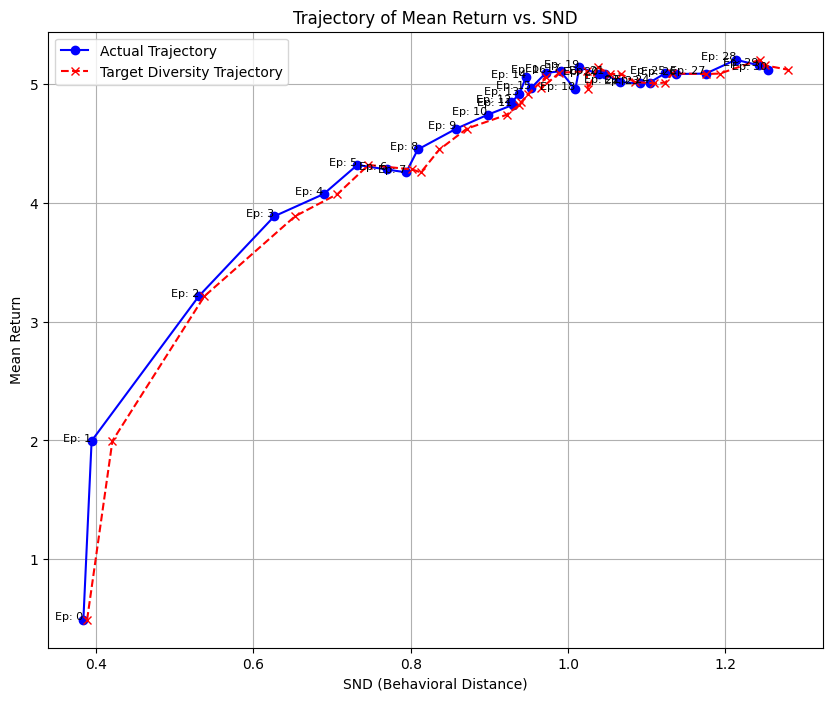

In [ ]:
if df is not None:
    # Get the data from the DataFrame columns
    episodes = df['episode_number']
    snd = df['actual_snd']
    returns = df['reward']
    
    if 'target_snd' in df.columns:
        target_diversity = df['target_snd']
    else:
        target_diversity = None
        
    # Plot the trajectory
    plot_trajectory_2d(episodes, snd, returns, target_diversity)